In [5]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
edits = pd.read_json("editSteps.json")
runs = pd.read_json("runSteps.json")

# rememebr to count the steps outsied the cycles

In [6]:
edits.stepTime.apply(lambda x: x/60).describe()

count    788.000000
mean       1.108651
std        2.157595
min        0.016667
25%        0.166667
50%        0.400000
75%        1.050000
max       20.666667
Name: stepTime, dtype: float64

In [7]:
 edits.editFiles.describe()

count    788.000000
mean       1.031726
std        0.798829
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: editFiles, dtype: float64

In [8]:
 edits.browsFile.describe()

count    788.000000
mean       0.713198
std        1.176422
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       13.000000
Name: browsFile, dtype: float64

In [9]:
runs.stepTime.apply(lambda x: x/60).describe()

count    788.000000
mean       0.479674
std        0.904214
min        0.016667
25%        0.116667
50%        0.250000
75%        0.533333
max       16.683333
Name: stepTime, dtype: float64

In [10]:
runs.runMethod.describe()

count        788
unique         2
top       manual
freq         650
Name: runMethod, dtype: object

In [11]:
runs.output.describe()

count              788
unique               2
top       final output
freq               610
Name: output, dtype: object

In [12]:
x =runs.groupby("work")["output"].value_counts()
y =runs.groupby("work")["runMethod"].value_counts()


In [13]:

output_finalD =x.debugging["final output"]
output_stateD = x.debugging["program state"]
output_totalD = x.debugging["final output"] + x.debugging["program state"]

output_finalP =x.programming["final output"]
output_stateP = x.programming["program state"]
output_totalP = x.programming["final output"] + x.programming["program state"]

# 
method_manualD =y.debugging["manual"]
method_testD = y.debugging["autamted test"]
method_totalD = y.debugging["manual"] + y.debugging["autamted test"]

method_manualP =y.programming["manual"]
method_testP = y.programming["autamted test"]
method_totalP = y.programming["manual"] + y.programming["autamted test"]


outputResult = pd.DataFrame({"work":["debugging","debugging", "programming","programming","debugging","debugging", "programming","programming"],"characteristics": ["final","states",  "final","states", "manual", "tests","manual", "tests"], "percentage":[output_finalD/ output_totalD*100,output_stateD/ output_totalD*100,output_finalP/ output_totalP*100, output_stateP/ output_totalP*100,method_manualD/ method_totalD*100,method_testD/ method_totalD*100,method_manualP/ method_totalP*100,method_testP/ method_totalP*100 ], "type":["output","output","output","output","run method","run method","run method","run method"]})




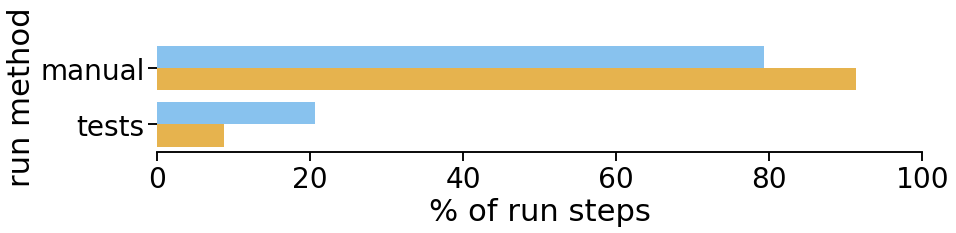

In [14]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar', data=outputResult[outputResult["type"]=="run method"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h", ci=None, height=3.5, aspect=4,sharey=False, legend=False)

(g.set_axis_labels("% of run steps", "run method")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("runMethodChara.pdf")


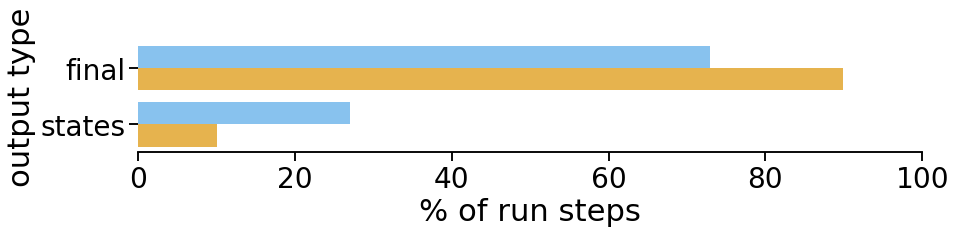

In [15]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar', data=outputResult[outputResult["type"]=="output"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h", ci=None, height=3.5, aspect=4,sharey=False, legend=False)

(g.set_axis_labels("% of run steps", "output type")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("runOutputChara.pdf")

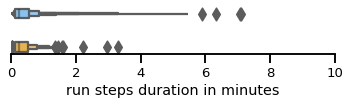

In [16]:
sns.set_context("talk", font_scale=.8)
runs["stepTimeInMinutes"]=runs.stepTime.apply(lambda x: x/60)

g = sns.catplot(x="stepTimeInMinutes", y='work', hue="work",kind="boxen", data=runs,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h",  height=1.7, aspect=3, legend=False)
(g.set_axis_labels("run steps duration in minutes", "")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 10))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
g.tight_layout()
plt.savefig("runTime.pdf")
 

,work,cycleTime,activities,stepTime,output,runMethod,otherWithRunTime
0,debugging,17,1,0.050000,program state,manual,0
1,debugging,21,1,0.083333,program state,manual,0
2,debugging,39,1,0.100000,program state,manual,0
3,debugging,27,1,0.050000,program state,manual,0
4,debugging,24,1,0.300000,program state,manual,0
...,...,...,...,...,...,...,...
783,programming,651,1,0.150000,final output,manual,0
784,programming,199,2,0.616667,final output,autamted test,50
785,programming,57,1,0.316667,final output,manual,0
786,programming,44,1,0.650000,final output,manual,0


In [17]:
x =edits.groupby("work")["editFiles"].value_counts(sort=False,normalize=True)
y =edits.groupby("work")["browsFile"].value_counts(sort=False,normalize=True)



In [18]:
x

work         editFiles
debugging    0            0.177281
             1            0.731497
             2            0.075731
             3            0.005164
             4            0.006885
             5            0.003442
programming  0            0.154589
             1            0.613527
             2            0.130435
             3            0.043478
             4            0.033816
             5            0.009662
             6            0.009662
             7            0.004831
Name: editFiles, dtype: float64

In [19]:
y


work         browsFile
debugging    0            0.597246
             1            0.277108
             2            0.075731
             3            0.032702
             4            0.006885
             5            0.005164
             6            0.001721
             12           0.001721
             13           0.001721
programming  0            0.468599
             1            0.289855
             2            0.149758
             3            0.053140
             4            0.024155
             5            0.009662
             9            0.004831
Name: browsFile, dtype: float64

In [20]:
outputResult2 = pd.DataFrame({"work":["debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming"],"characteristics": ["0","0","1","1","2","2","+3","+3","0","0","1","1","2","2","+3","+3"],"percentage":[x.debugging[0]*100,x.programming[0]*100,x.debugging[1]*100,x.programming[1]*100,x.debugging[2]*100,x.programming[2]*100,x.debugging[3:].sum()*100,x.programming[3:].sum()*100,y.debugging[0]*100,y.programming[0]*100,y.debugging[1]*100,y.programming[1]*100,y.debugging[2]*100,y.programming[2]*100,y.debugging[3:].sum()*100,y.programming[3:].sum()*100], "files":["edit","edit","edit","edit","edit","edit","edit","edit","browse","browse","browse","browse","browse","browse","browse","browse"]})

outputResult2

,work,characteristics,percentage,files
0,debugging,0,17.728055,edit
1,programming,0,15.458937,edit
2,debugging,1,73.149742,edit
3,programming,1,61.352657,edit
4,debugging,2,7.573150,edit
5,programming,2,13.043478,edit
6,debugging,+3,1.549053,edit
7,programming,+3,10.144928,edit
8,debugging,0,59.724613,browse
9,programming,0,46.859903,browse


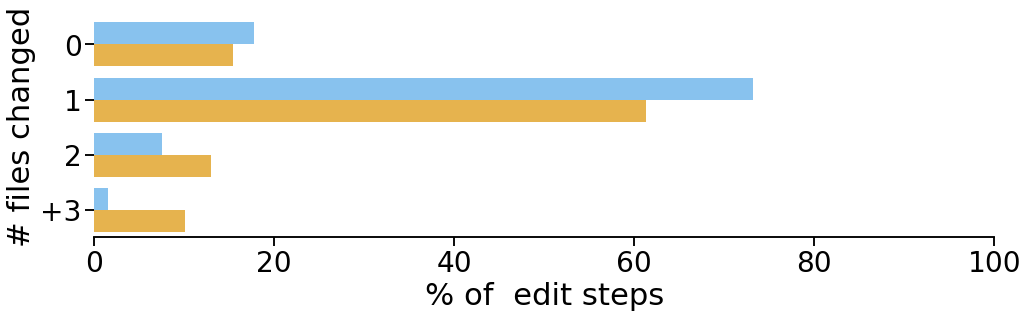

In [21]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=outputResult2[outputResult2["files"]=="edit"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=5, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of  edit steps", "# files changed")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("editFileChara.pdf")


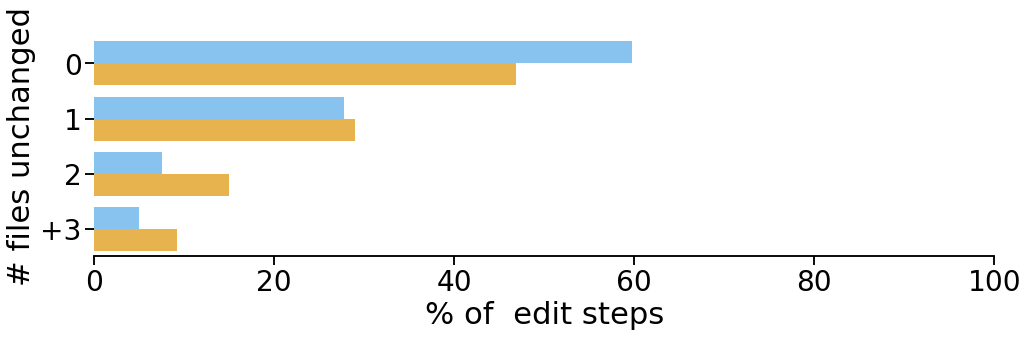

In [22]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=outputResult2[outputResult2["files"]=="browse"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=5, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of  edit steps", "# files unchanged")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("browseFileChara.pdf")

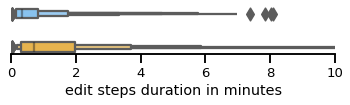

In [23]:
sns.set_context("talk", font_scale=.8)
edits["stepTimeInMinutes"]=edits.stepTime.apply(lambda x: x/60)

g = sns.catplot(x="stepTimeInMinutes", y='work', hue="work",kind="boxen", data=edits,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h",  height=1.7, aspect=3, legend=False)
(g.set_axis_labels("edit steps duration in minutes", "")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 10))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
g.tight_layout()
plt.savefig("editTime.pdf")

In [36]:
otherDebuggingR, otherProgrammingR = runs[(runs.otherResourcesTime > 0)|(runs.otherIssueTime > 0)|(runs.otherNotesTime > 0)|(runs.otherInteractionTime > 0)].groupby("work").cycleTime.count()

In [37]:
otherDebuggingE, otherProgrammingE =edits[(edits.otherResourcesTime > 0)|(edits.otherIssueTime > 0)|(edits.otherNotesTime > 0)|(edits.otherInteractionTime > 0)].groupby("work").cycleTime.count()

 other inside edit step 

In [38]:
otherDebuggingE/edits.groupby("work").cycleTime.count()[0]*100

17.728055077452666

In [41]:
(otherDebuggingE+otherProgrammingE)
# /edits.cycleTime.count()*100

188

In [40]:
(otherDebuggingR+otherProgrammingR)
# /runs.cycleTime.count()*100

21